In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def set_path(name_image):
    image_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/img/' + name_image + '.jpg'
    mask_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask/' + name_image + '.jpg'
    mask_pred_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask-pred/' + name_image + '.png'
    fig_pred_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask-pred/' + 'fig-full-' + name_image + '.png'
    return image_path, mask_path, mask_pred_path, fig_pred_path

In [3]:
# unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-3.h5')
# unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-256x256-25ep-96%.h5')
# unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-256x256-50ep-97%.h5')
unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-256x256-dataAug-50ep-99%.h5')

In [4]:
def prepareImage(image):
    single_img = Image.open(image).convert('RGB')
    single_img = single_img.resize((256, 256))
    single_img = np.reshape(single_img, (256, 256, 3))
    single_img = single_img/256.
    return single_img

def unet_predict(image):
    img = image[np.newaxis, ...]
    pred_y = unet.predict(img)
    pred_mask = tf.argmax(pred_y[0], axis=-1)
    return pred_mask

In [7]:
image_path, mask_path, mask_pred_path, fig_pred_path = set_path('nt-524')
image = prepareImage(image_path)
mask_pred = unet_predict(image)
plt.imsave(mask_pred_path, mask_pred)

1/1 [==============================] - 1s 626ms/step


Text(0.5, 1.0, 'Processed predict mask ')

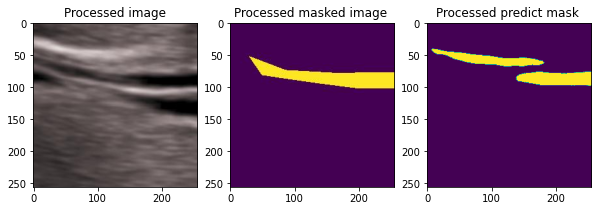

In [8]:
image = plt.imread(image_path)
mask = plt.imread(mask_path)

fig, arr = plt.subplots(1, 3, figsize=(10, 10))
arr[0].imshow(image)
arr[0].set_title('Processed image')
arr[1].imshow(mask)
arr[1].set_title('Processed masked image ')
arr[2].imshow(mask_pred)
arr[2].set_title('Processed predict mask ')

# fig.savefig(fig_pred_path)

In [9]:
fig.savefig('Còn sai sót.png')